# Data Cleaning and Preprocessing

Read in the article data (created in getting-started/1_create_dataframe.py) and the dataset data (train.csv in the original data).

Install data analysis and plotting libraries:

In [1]:
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns

## Reading in Data

Read in the pickle file created in getting-started/1_create_dataframe.pygetting-started/1_create_dataframe.py:

In [3]:
!pip3 install pickle5
import pickle5 as pickle
with open("../getting_started/articles_df.pkl", "rb") as fh:
  data = pickle.load(fh)

Defaulting to user installation because normal site-packages is not writeable


Create a pandas dataframe:

In [9]:
articles = pd.DataFrame(data)
articles.head()

,section_title,text,article_id
0,,"On 26 January 2010, at an ordinary airport hot...",0213936a-340f-47cf-a5e6-2ca353343a77
1,PART 2: CAN ALZHEIMER'S PREVENTION INITIATIVE ...,Reiman was not alone in thinking about such tr...,0213936a-340f-47cf-a5e6-2ca353343a77
2,PART 3: TRIALS IN COLOMBIA AND THE U.S. FOR TH...,During two recent all-day discussions with aca...,0213936a-340f-47cf-a5e6-2ca353343a77
3,"PART 4: FOR SHARED PREVENTION TRIALS, DEVIL IS...","In Phoenix, a roomful of senior industry and a...",0213936a-340f-47cf-a5e6-2ca353343a77
4,"Drug Selection: Can We Have Privacy, Please!",If anyone was hoping that representatives from...,0213936a-340f-47cf-a5e6-2ca353343a77


Read in the CSV file with the dataset data and create another pandas dataframe:

In [7]:
datasets = pd.read_csv("../getting_started/coleridgeinitiative-show-us-the-data/train.csv")
datasets.head()

,Id,pub_title,dataset_title,dataset_label,cleaned_label
0,d0fa7568-7d8e-4db9-870f-f9c6f668c17b,The Impact of Dual Enrollment on College Degre...,National Education Longitudinal Study,National Education Longitudinal Study,national education longitudinal study
1,2f26f645-3dec-485d-b68d-f013c9e05e60,Educational Attainment of High School Dropouts...,National Education Longitudinal Study,National Education Longitudinal Study,national education longitudinal study
2,c5d5cd2c-59de-4f29-bbb1-6a88c7b52f29,Differences in Outcomes for Female and Male St...,National Education Longitudinal Study,National Education Longitudinal Study,national education longitudinal study
3,5c9a3bc9-41ba-4574-ad71-e25c1442c8af,Stepping Stone and Option Value in a Model of ...,National Education Longitudinal Study,National Education Longitudinal Study,national education longitudinal study
4,c754dec7-c5a3-4337-9892-c02158475064,"Parental Effort, School Resources, and Student...",National Education Longitudinal Study,National Education Longitudinal Study,national education longitudinal study


## Some basic data information

Number of articles

In [10]:
articles['article_id'].nunique()

14316

In [68]:
datasets['Id'].nunique()

14316

Number of unique datasets identified

In [13]:
datasets['cleaned_label'].nunique()

130

Create a dataset of only unique dataset names

In [25]:
datasets_unique = pd.DataFrame(datasets['cleaned_label'].unique(),columns=['cleaned_label'])
datasets_unique.head()

,cleaned_label
0,national education longitudinal study
1,noaa tidal station
2,slosh model
3,noaa c cap
4,aging integrated database agid


Histogram to visualise the length of dataset names

<AxesSubplot:xlabel='cleaned_label'>

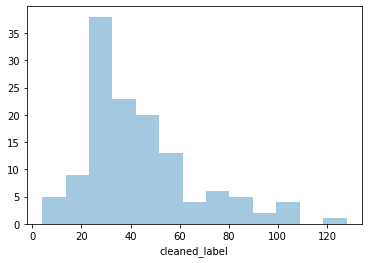

In [26]:

dataset_length = datasets_unique['cleaned_label'].apply(len)
sns.distplot(dataset_length, kde=False)

Further data wrangling and analysis to add here:

* Most common dataset names
* Number of words
* Investigate section names (are there common section names?)
* Number of sections per article
* Which sections do the dataset names occur?
* What sentences contain the dataset names?

## Text Preprocessing

### Contraction Mapping

In [28]:
# Contraction Mapping

!pip install contractions
import contractions

Defaulting to user installation because normal site-packages is not writeable


In [29]:
datasets_unique['contractions'] = datasets_unique['cleaned_label'].apply(lambda x: [contractions.fix(word) for word in x.split()])
datasets_unique.sample(10, random_state = 5)

,cleaned_label,contractions
87,usda census of agriculture,"[usda, census, of, agriculture]"
50,national assessment of education progress,"[national, assessment, of, education, progress]"
42,national oceanic and atmospheric administratio...,"[national, oceanic, and, atmospheric, administ..."
52,high school longitudinal study,"[high, school, longitudinal, study]"
81,ncses survey of graduate students and postdoct...,"[ncses, survey, of, graduate, students, and, p..."
114,sars cov 2 complete genome sequence,"[sars, cov, 2, complete, genome, sequence]"
64,noaa storm surge inundation,"[noaa, storm, surge, inundation]"
21,national teacher and principal survey,"[national, teacher, and, principal, survey]"
35,national science foundation survey of graduate...,"[national, science, foundation, survey, of, gr..."
108,covid 19 genome sequence,"[covid, 19, genome, sequence]"


In [30]:
#joining back the list of items into one string

datasets_unique['rejoined'] = [' '.join(map(str, l)) for l in datasets_unique['contractions']]
datasets_unique.sample(10, random_state = 5)

,cleaned_label,contractions,rejoined
87,usda census of agriculture,"[usda, census, of, agriculture]",usda census of agriculture
50,national assessment of education progress,"[national, assessment, of, education, progress]",national assessment of education progress
42,national oceanic and atmospheric administratio...,"[national, oceanic, and, atmospheric, administ...",national oceanic and atmospheric administratio...
52,high school longitudinal study,"[high, school, longitudinal, study]",high school longitudinal study
81,ncses survey of graduate students and postdoct...,"[ncses, survey, of, graduate, students, and, p...",ncses survey of graduate students and postdoct...
114,sars cov 2 complete genome sequence,"[sars, cov, 2, complete, genome, sequence]",sars cov 2 complete genome sequence
64,noaa storm surge inundation,"[noaa, storm, surge, inundation]",noaa storm surge inundation
21,national teacher and principal survey,"[national, teacher, and, principal, survey]",national teacher and principal survey
35,national science foundation survey of graduate...,"[national, science, foundation, survey, of, gr...",national science foundation survey of graduate...
108,covid 19 genome sequence,"[covid, 19, genome, sequence]",covid 19 genome sequence


### Lowercasing and removing punctionation

In [33]:
# Noise Cleaning - spacing, special characters, lowercasing 

import regex as re
datasets_unique['lower'] = datasets_unique['rejoined'].str.lower()
datasets_unique['clean'] = datasets_unique['lower'].apply(lambda x: re.sub(r'[^\w\d\s\']+', '', x))

datasets_unique.sample(10, random_state = 5)

,cleaned_label,contractions,rejoined,lower,clean
87,usda census of agriculture,"[usda, census, of, agriculture]",usda census of agriculture,usda census of agriculture,usda census of agriculture
50,national assessment of education progress,"[national, assessment, of, education, progress]",national assessment of education progress,national assessment of education progress,national assessment of education progress
42,national oceanic and atmospheric administratio...,"[national, oceanic, and, atmospheric, administ...",national oceanic and atmospheric administratio...,national oceanic and atmospheric administratio...,national oceanic and atmospheric administratio...
52,high school longitudinal study,"[high, school, longitudinal, study]",high school longitudinal study,high school longitudinal study,high school longitudinal study
81,ncses survey of graduate students and postdoct...,"[ncses, survey, of, graduate, students, and, p...",ncses survey of graduate students and postdoct...,ncses survey of graduate students and postdoct...,ncses survey of graduate students and postdoct...
114,sars cov 2 complete genome sequence,"[sars, cov, 2, complete, genome, sequence]",sars cov 2 complete genome sequence,sars cov 2 complete genome sequence,sars cov 2 complete genome sequence
64,noaa storm surge inundation,"[noaa, storm, surge, inundation]",noaa storm surge inundation,noaa storm surge inundation,noaa storm surge inundation
21,national teacher and principal survey,"[national, teacher, and, principal, survey]",national teacher and principal survey,national teacher and principal survey,national teacher and principal survey
35,national science foundation survey of graduate...,"[national, science, foundation, survey, of, gr...",national science foundation survey of graduate...,national science foundation survey of graduate...,national science foundation survey of graduate...
108,covid 19 genome sequence,"[covid, 19, genome, sequence]",covid 19 genome sequence,covid 19 genome sequence,covid 19 genome sequence


### Tokenisation

In [20]:
import nltk
nltk.download('punkt')
nltk.download('averaged_perceptron_tagger')
from nltk.tokenize import word_tokenize

[nltk_data] Downloading package punkt to /Users/laura/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /Users/laura/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


In [34]:
#nltk tokenization

datasets_unique['tokenized_text'] = datasets_unique['clean'].apply(word_tokenize)
datasets_unique.sample(10, random_state = 5)

,cleaned_label,contractions,rejoined,lower,clean,tokenized_text
87,usda census of agriculture,"[usda, census, of, agriculture]",usda census of agriculture,usda census of agriculture,usda census of agriculture,"[usda, census, of, agriculture]"
50,national assessment of education progress,"[national, assessment, of, education, progress]",national assessment of education progress,national assessment of education progress,national assessment of education progress,"[national, assessment, of, education, progress]"
42,national oceanic and atmospheric administratio...,"[national, oceanic, and, atmospheric, administ...",national oceanic and atmospheric administratio...,national oceanic and atmospheric administratio...,national oceanic and atmospheric administratio...,"[national, oceanic, and, atmospheric, administ..."
52,high school longitudinal study,"[high, school, longitudinal, study]",high school longitudinal study,high school longitudinal study,high school longitudinal study,"[high, school, longitudinal, study]"
81,ncses survey of graduate students and postdoct...,"[ncses, survey, of, graduate, students, and, p...",ncses survey of graduate students and postdoct...,ncses survey of graduate students and postdoct...,ncses survey of graduate students and postdoct...,"[ncses, survey, of, graduate, students, and, p..."
114,sars cov 2 complete genome sequence,"[sars, cov, 2, complete, genome, sequence]",sars cov 2 complete genome sequence,sars cov 2 complete genome sequence,sars cov 2 complete genome sequence,"[sars, cov, 2, complete, genome, sequence]"
64,noaa storm surge inundation,"[noaa, storm, surge, inundation]",noaa storm surge inundation,noaa storm surge inundation,noaa storm surge inundation,"[noaa, storm, surge, inundation]"
21,national teacher and principal survey,"[national, teacher, and, principal, survey]",national teacher and principal survey,national teacher and principal survey,national teacher and principal survey,"[national, teacher, and, principal, survey]"
35,national science foundation survey of graduate...,"[national, science, foundation, survey, of, gr...",national science foundation survey of graduate...,national science foundation survey of graduate...,national science foundation survey of graduate...,"[national, science, foundation, survey, of, gr..."
108,covid 19 genome sequence,"[covid, 19, genome, sequence]",covid 19 genome sequence,covid 19 genome sequence,covid 19 genome sequence,"[covid, 19, genome, sequence]"


### Stop Words

In [32]:
# initializing Stop words libraries

nltk.download('stopwords')
from nltk.corpus import stopwords
stop_words = set(stopwords.words('english'))

[nltk_data] Downloading package stopwords to /Users/laura/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


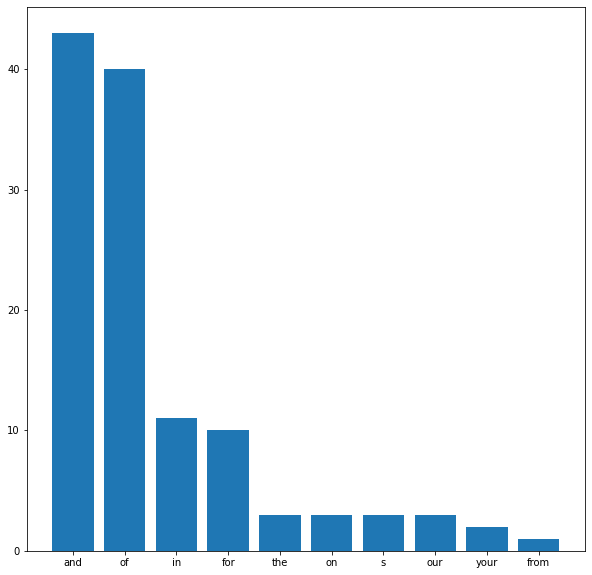

In [36]:
# Before removing checking occurances of stopwords in headline


def plot_top_stopwords_barchart(text):
    stop=set(stopwords.words('english'))
    
    new= text.str.split()
    new=new.values.tolist()
    corpus=[word for i in new for word in i]
    from collections import defaultdict
    dic=defaultdict(int)
    for word in corpus:
        if word in stop:
            dic[word]+=1
            
    top=sorted(dic.items(), key=lambda x:x[1],reverse=True)[:10]
    x,y=zip(*top)
    plt.figure(figsize=(10,10))
    plt.bar(x,y)

plot_top_stopwords_barchart(datasets_unique['clean'])


In [40]:
# Now removing stopwords 

datasets_unique['tokenized_text_stop_rem'] = datasets_unique['tokenized_text'].apply(lambda x: [word for word in x if word not in stop_words])
datasets_unique['tokenized_text_join'] = [' '.join(map(str, l)) for l in datasets_unique['tokenized_text_stop_rem']]

datasets_unique.sample(10, random_state = 5)

,cleaned_label,contractions,rejoined,lower,clean,tokenized_text,tokenized_text_stop_rem,tokenized_text_join
87,usda census of agriculture,"[usda, census, of, agriculture]",usda census of agriculture,usda census of agriculture,usda census of agriculture,"[usda, census, of, agriculture]","[usda, census, agriculture]",usda census agriculture
50,national assessment of education progress,"[national, assessment, of, education, progress]",national assessment of education progress,national assessment of education progress,national assessment of education progress,"[national, assessment, of, education, progress]","[national, assessment, education, progress]",national assessment education progress
42,national oceanic and atmospheric administratio...,"[national, oceanic, and, atmospheric, administ...",national oceanic and atmospheric administratio...,national oceanic and atmospheric administratio...,national oceanic and atmospheric administratio...,"[national, oceanic, and, atmospheric, administ...","[national, oceanic, atmospheric, administratio...",national oceanic atmospheric administration op...
52,high school longitudinal study,"[high, school, longitudinal, study]",high school longitudinal study,high school longitudinal study,high school longitudinal study,"[high, school, longitudinal, study]","[high, school, longitudinal, study]",high school longitudinal study
81,ncses survey of graduate students and postdoct...,"[ncses, survey, of, graduate, students, and, p...",ncses survey of graduate students and postdoct...,ncses survey of graduate students and postdoct...,ncses survey of graduate students and postdoct...,"[ncses, survey, of, graduate, students, and, p...","[ncses, survey, graduate, students, postdoctor...",ncses survey graduate students postdoctorates ...
114,sars cov 2 complete genome sequence,"[sars, cov, 2, complete, genome, sequence]",sars cov 2 complete genome sequence,sars cov 2 complete genome sequence,sars cov 2 complete genome sequence,"[sars, cov, 2, complete, genome, sequence]","[sars, cov, 2, complete, genome, sequence]",sars cov 2 complete genome sequence
64,noaa storm surge inundation,"[noaa, storm, surge, inundation]",noaa storm surge inundation,noaa storm surge inundation,noaa storm surge inundation,"[noaa, storm, surge, inundation]","[noaa, storm, surge, inundation]",noaa storm surge inundation
21,national teacher and principal survey,"[national, teacher, and, principal, survey]",national teacher and principal survey,national teacher and principal survey,national teacher and principal survey,"[national, teacher, and, principal, survey]","[national, teacher, principal, survey]",national teacher principal survey
35,national science foundation survey of graduate...,"[national, science, foundation, survey, of, gr...",national science foundation survey of graduate...,national science foundation survey of graduate...,national science foundation survey of graduate...,"[national, science, foundation, survey, of, gr...","[national, science, foundation, survey, gradua...",national science foundation survey graduate st...
108,covid 19 genome sequence,"[covid, 19, genome, sequence]",covid 19 genome sequence,covid 19 genome sequence,covid 19 genome sequence,"[covid, 19, genome, sequence]","[covid, 19, genome, sequence]",covid 19 genome sequence


### Most Common Words

<AxesSubplot:>

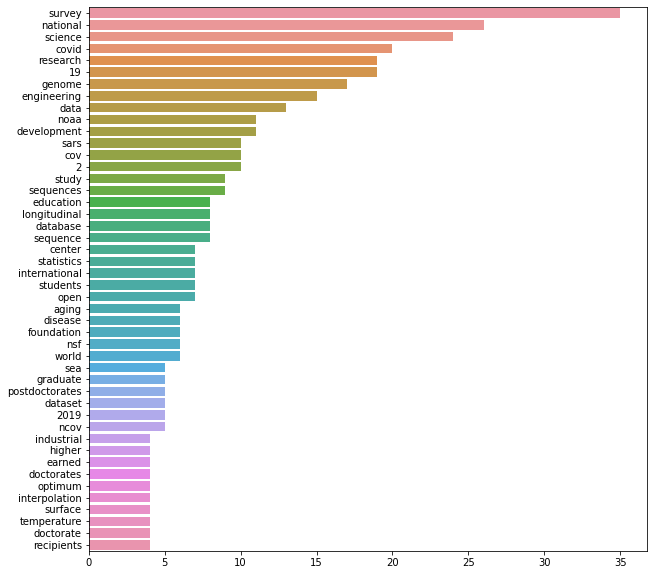

In [38]:
from collections import  Counter

# def plot_top_non_stopwords_barchart(text):
stop=set(stopwords.words('english'))

new= datasets_unique['clean'].str.split()
new=new.values.tolist()
corpus=[word for i in new for word in i]

counter=Counter(corpus)
most=counter.most_common()
x, y=[], []
for word,count in most[:50]:
    if (word not in stop):
        x.append(word)
        y.append(count)
plt.figure(figsize=(10,10))
sns.barplot(x=y,y=x)

# plot_top_non_stopwords_barchart(tweets['clean'])

# Explore more such analysis here - https://neptune.ai/blog/exploratory-data-analysis-natural-language-processing-tools

In [39]:
most_no_stop = []
for i in range(len(most)):
  if (most[i][0] not in stop):
    most_no_stop.append(most[i])

most_no_stop

[('survey', 35),
 ('national', 26),
 ('science', 24),
 ('covid', 20),
 ('research', 19),
 ('19', 19),
 ('genome', 17),
 ('engineering', 15),
 ('data', 13),
 ('noaa', 11),
 ('development', 11),
 ('sars', 10),
 ('cov', 10),
 ('2', 10),
 ('study', 9),
 ('sequences', 9),
 ('education', 8),
 ('longitudinal', 8),
 ('database', 8),
 ('sequence', 8),
 ('center', 7),
 ('statistics', 7),
 ('international', 7),
 ('students', 7),
 ('open', 7),
 ('aging', 6),
 ('disease', 6),
 ('foundation', 6),
 ('nsf', 6),
 ('world', 6),
 ('sea', 5),
 ('graduate', 5),
 ('postdoctorates', 5),
 ('dataset', 5),
 ('2019', 5),
 ('ncov', 5),
 ('industrial', 4),
 ('higher', 4),
 ('earned', 4),
 ('doctorates', 4),
 ('optimum', 4),
 ('interpolation', 4),
 ('surface', 4),
 ('temperature', 4),
 ('doctorate', 4),
 ('recipients', 4),
 ('facilities', 4),
 ('comprehensive', 4),
 ('catalog', 4),
 ('station', 3),
 ('water', 3),
 ('level', 3),
 ('beginning', 3),
 ('postsecondary', 3),
 ('alzheimer', 3),
 ('common', 3),
 ('core', 3

### Parts of Speech Tagging

In [41]:
# for sake of simplicity, showing 10 tweets based on the same seed value at 5
tagged_stanzas = []
tagged = []

for word in datasets_unique['tokenized_text_stop_rem']:
  tagged_word = nltk.pos_tag(word)
  print(tagged_word)

  tagged_stanzas.append(tagged_word)

# This format is needed for below visualizer as in takes only two values. If you skip this format, it might give you - "too many values to unpack error" 
tagged.append(tagged_stanzas)

[('national', 'JJ'), ('education', 'NN'), ('longitudinal', 'NN'), ('study', 'NN')]
[('noaa', 'RB'), ('tidal', 'JJ'), ('station', 'NN')]
[('slosh', 'NN'), ('model', 'NN')]
[('noaa', 'JJ'), ('c', 'NN'), ('cap', 'NN')]
[('aging', 'VBG'), ('integrated', 'JJ'), ('database', 'NN'), ('agid', 'NN')]
[('alzheimers', 'NNS'), ('disease', 'VBP'), ('neuroimaging', 'VBG'), ('initiative', 'NN')]
[('aging', 'VBG'), ('integrated', 'JJ'), ('database', 'NN')]
[('noaa', 'JJ'), ('national', 'JJ'), ('water', 'NN'), ('level', 'NN'), ('observation', 'NN'), ('network', 'NN')]
[('noaa', 'JJ'), ('water', 'NN'), ('level', 'NN'), ('station', 'NN')]
[('baltimore', 'IN'), ('longitudinal', 'JJ'), ('study', 'NN'), ('aging', 'VBG'), ('blsa', 'NN')]
[('national', 'JJ'), ('water', 'NN'), ('level', 'NN'), ('observation', 'NN'), ('network', 'NN')]
[('arms', 'NNS'), ('farm', 'VBP'), ('financial', 'JJ'), ('crop', 'NN'), ('production', 'NN'), ('practices', 'NNS')]
[('beginning', 'VBG'), ('postsecondary', 'JJ'), ('student', 'N

In [42]:
# Yellow Brick is a POS visualizer - https://github.com/DistrictDataLabs/yellowbrick/blob/master/docs/api/text/postag.rst
# You may need to reload the workbook to activate it. In that case, re-run all cells again from the beginning 

!pip install -U yellowbrick

Defaulting to user installation because normal site-packages is not writeable


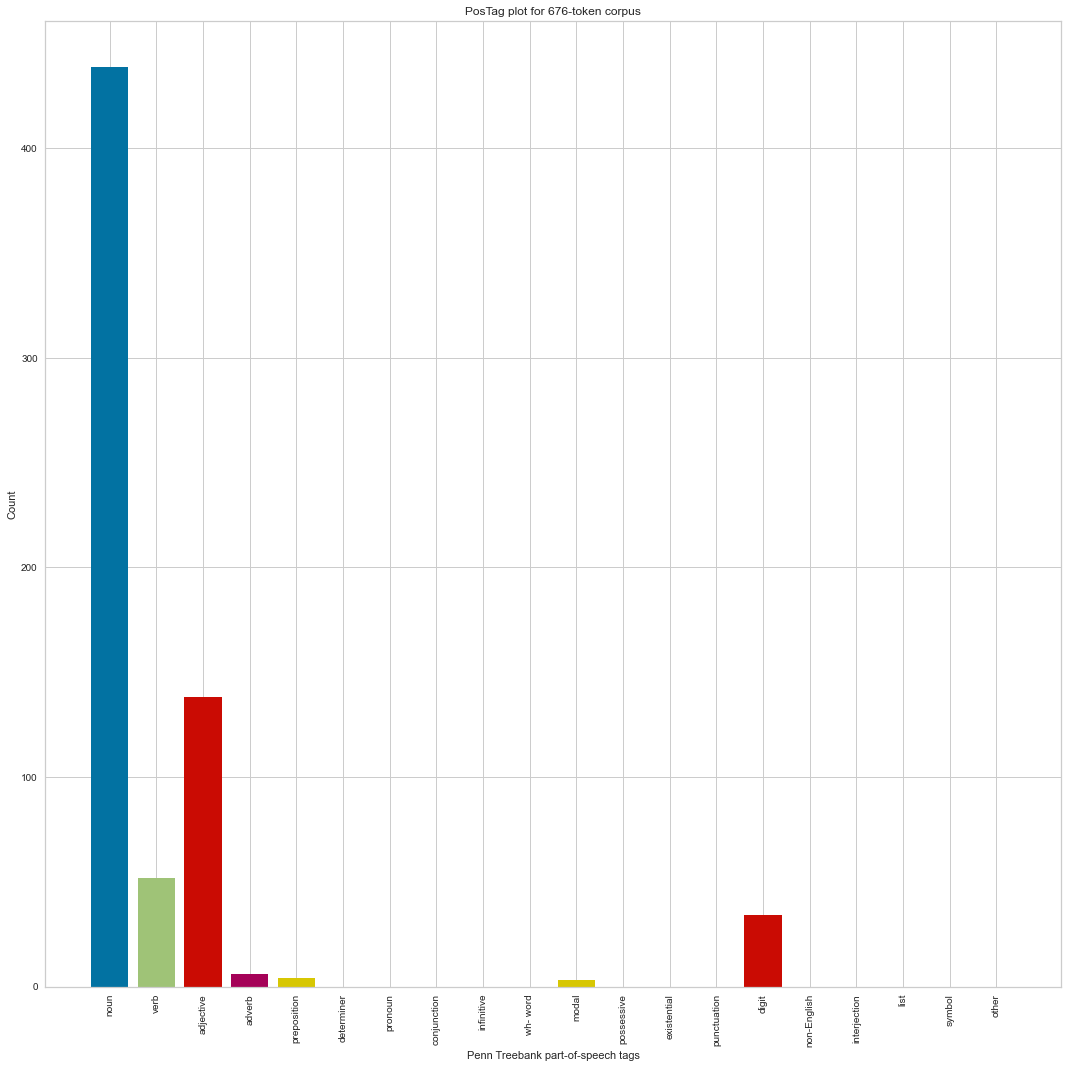

<AxesSubplot:title={'center':'PosTag plot for 676-token corpus'}, xlabel='Penn Treebank part-of-speech tags', ylabel='Count'>

In [43]:
# Create the visualizer

from yellowbrick.text import PosTagVisualizer
plt.figure(figsize=(15,15))
viz = PosTagVisualizer()
viz.fit(tagged)
viz.show()


In [44]:
import nltk 

for sentence in tagged_stanzas[0:5]:
  print(sentence)
  pattern = "NP: {<DT>?<JJ>*<NN>}"
  NPChunker = nltk.RegexpParser(pattern) 
  result = NPChunker.parse(sentence)
  result.pprint()
  print()

[('national', 'JJ'), ('education', 'NN'), ('longitudinal', 'NN'), ('study', 'NN')]
(S (NP national/JJ education/NN) (NP longitudinal/NN) (NP study/NN))

[('noaa', 'RB'), ('tidal', 'JJ'), ('station', 'NN')]
(S noaa/RB (NP tidal/JJ station/NN))

[('slosh', 'NN'), ('model', 'NN')]
(S (NP slosh/NN) (NP model/NN))

[('noaa', 'JJ'), ('c', 'NN'), ('cap', 'NN')]
(S (NP noaa/JJ c/NN) (NP cap/NN))

[('aging', 'VBG'), ('integrated', 'JJ'), ('database', 'NN'), ('agid', 'NN')]
(S aging/VBG (NP integrated/JJ database/NN) (NP agid/NN))



In [45]:
!pip3 install spacy
!python3 -m spacy download en_core_web_sm

Defaulting to user installation because normal site-packages is not writeable
Defaulting to user installation because normal site-packages is not writeable
     |████████████████████████████████| 12.0 MB 8.4 MB/s 
✔ Download and installation successful
You can now load the model via spacy.load('en_core_web_sm')


In [46]:
import spacy
nlp = spacy.load('en_core_web_sm')
nlp

In [48]:
from spacy import displacy

for sentence in datasets_unique['clean'].sample(5, random_state = 5):
  sentence_doc = nlp(sentence)
  
  displacy.render(sentence_doc, style='dep', jupyter=True)
  print("Sentence is: ", sentence_doc)

Sentence is:  usda census of agriculture


Sentence is:  national assessment of education progress


Sentence is:  national oceanic and atmospheric administration optimum interpolation sea surface temperature


Sentence is:  high school longitudinal study


Sentence is:  ncses survey of graduate students and postdoctorates in science and engineering


In [49]:
# Extract Noun Phrases

for sentence in datasets_unique['clean'].sample(5, random_state = 5):
  print("Sentence is: ", sentence)
  sentence_doc = nlp(sentence)

  for chunk in sentence_doc.noun_chunks:
    print ("Chunked noun phrases found: ",chunk)
  print()

Sentence is:  usda census of agriculture
Chunked noun phrases found:  usda census
Chunked noun phrases found:  agriculture

Sentence is:  national assessment of education progress
Chunked noun phrases found:  national assessment
Chunked noun phrases found:  education progress

Sentence is:  national oceanic and atmospheric administration optimum interpolation sea surface temperature
Chunked noun phrases found:  national oceanic
Chunked noun phrases found:  atmospheric administration optimum interpolation sea surface temperature

Sentence is:  high school longitudinal study
Chunked noun phrases found:  high school longitudinal study

Sentence is:  ncses survey of graduate students and postdoctorates in science and engineering
Chunked noun phrases found:  ncses survey
Chunked noun phrases found:  graduate students
Chunked noun phrases found:  postdoctorates
Chunked noun phrases found:  science
Chunked noun phrases found:  engineering



In [50]:
# Extract Verb Phrases
! pip install textacy

Defaulting to user installation because normal site-packages is not writeable


In [52]:
import textacy
# import warnings
# warnings.filterwarnings("ignore")

pattern = r'(<VERB>?<ADV>*<VERB>+)'

for sentence in datasets_unique['tokenized_text_join'].sample(5, random_state = 5):
  print("Sentence is: ", sentence)

  sentence_doc = textacy.make_spacy_doc(sentence, lang='en_core_web_sm')
  verb_phrases = textacy.extract.pos_regex_matches(sentence_doc, pattern)

  # Print all Verb Phrase
  for chunk in verb_phrases:
    print("Verb Phrase found: ",chunk.text)
  print()



Sentence is:  usda census agriculture

Sentence is:  national assessment education progress

Sentence is:  national oceanic atmospheric administration optimum interpolation sea surface temperature

Sentence is:  high school longitudinal study

Sentence is:  ncses survey graduate students postdoctorates science engineering
Verb Phrase found:  survey
Verb Phrase found:  postdoctorates

/Users/laura/Library/Python/3.8/lib/python/site-packages/textacy/extract.py:334: DeprecationWarning: `pos_regex_matches()` has been deprecated! for similar but more powerful and performant functionality, use `textacy.extract.matches()` instead.
  utils.deprecated(
/Users/laura/Library/Python/3.8/lib/python/site-packages/textacy/extract.py:334: DeprecationWarning: `pos_regex_matches()` has been deprecated! for similar but more powerful and performant functionality, use `textacy.extract.matches()` instead.
  utils.deprecated(
/Users/laura/Library/Python/3.8/lib/python/site-packages/textacy/extract.py:334: De

### Named Entity Recognition

In [54]:
for sentence in datasets_unique['tokenized_text_join'].sample(5, random_state = 90):
  print("Sentence is: ", sentence)
  sentence_doc = nlp(sentence)
  displacy.render(sentence_doc,style='ent',jupyter=True)
  print()

Sentence is:  jh crown registry



Sentence is:  high school longitudinal study



Sentence is:  national teacher principal survey



Sentence is:  genome sequences 2019 ncov



Sentence is:  school survey crime safety


In [55]:
from tqdm import tqdm, tqdm_notebook

nlp = spacy.load('en_core_web_sm',
                 disable=['parser', 
                          'tagger',
                          'textcat'])

In [56]:
frames = []
for i in tqdm_notebook(range(len(datasets_unique['tokenized_text_join']))):
    doc = datasets_unique.loc[i,'tokenized_text_join']
    text_id = i
    doc = nlp(doc)

    ents = [(e.text, e.start_char, e.end_char, e.label_) for e in doc.ents if len(e.text.strip(' -—')) > 0]
    frame = pd.DataFrame(ents)
    frame['id'] = text_id
    frames.append(frame)

  0%|          | 0/130 [00:00<?, ?it/s]

In [58]:
ner = pd.concat(frames)
ner.columns = ['Text','Start','Stop','NER_Type','id']
ner.tail()

,Text,Start,Stop,NER_Type,id
0,rsna international covid open,0.0,29.0,EVENT,126
0,19,10.0,12.0,CARDINAL,127
0,19,10.0,12.0,CARDINAL,128
1,compounds data,33.0,47.0,ORG,128
0,19,10.0,12.0,CARDINAL,129


<AxesSubplot:xlabel='NER Types', ylabel='Counts'>

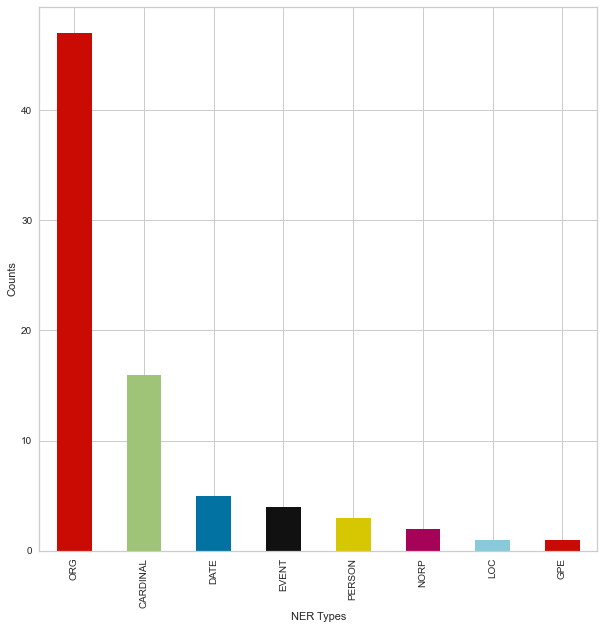

In [59]:
color_list = list('rgbkymc')  #red, green, blue, black, etc.
plt.figure(figsize=(10,10))
plt.xlabel("NER Types")
plt.ylabel("Counts")

ner.NER_Type.value_counts().plot(kind='bar', color = color_list)

<AxesSubplot:xlabel='Top 20 orgs mentioned', ylabel='Counts'>

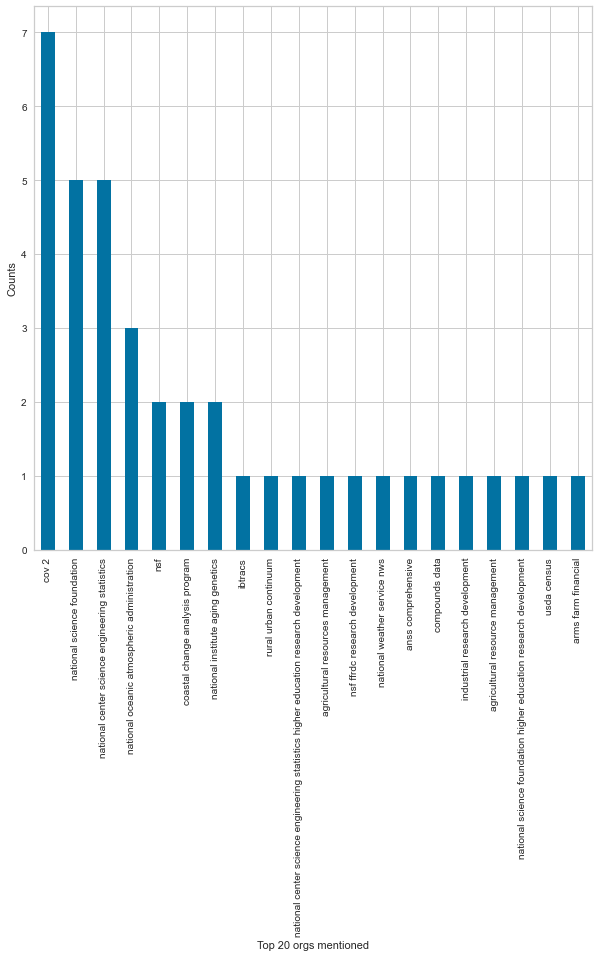

In [60]:
person = ner[ner.NER_Type == 'ORG']
plt.figure(figsize=(10,10))
plt.xlabel("Top 20 orgs mentioned")
plt.ylabel("Counts")

person.Text.value_counts()[:20].plot(kind='bar')

<AxesSubplot:xlabel='Top 20 people mentioned', ylabel='Counts'>

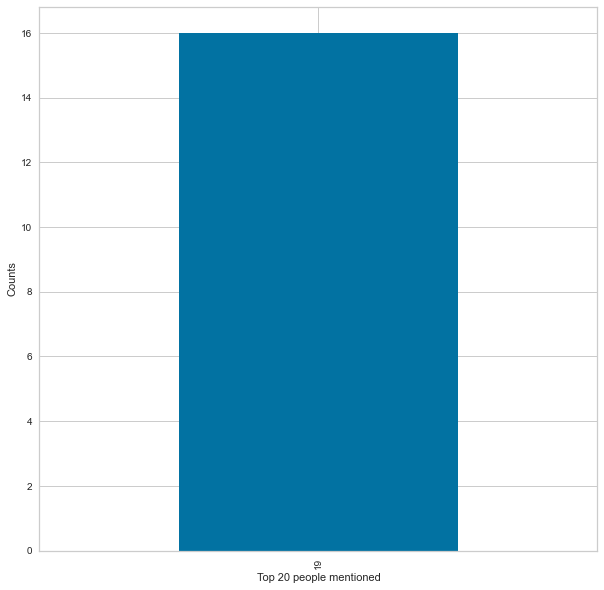

In [62]:
person = ner[ner.NER_Type == 'CARDINAL']
plt.figure(figsize=(10,10))
plt.xlabel("Top 20 people mentioned")
plt.ylabel("Counts")

person.Text.value_counts()[:20].plot(kind='bar')

### N-grams

In [63]:
from nltk.util import ngrams
from sklearn.feature_extraction.text import CountVectorizer

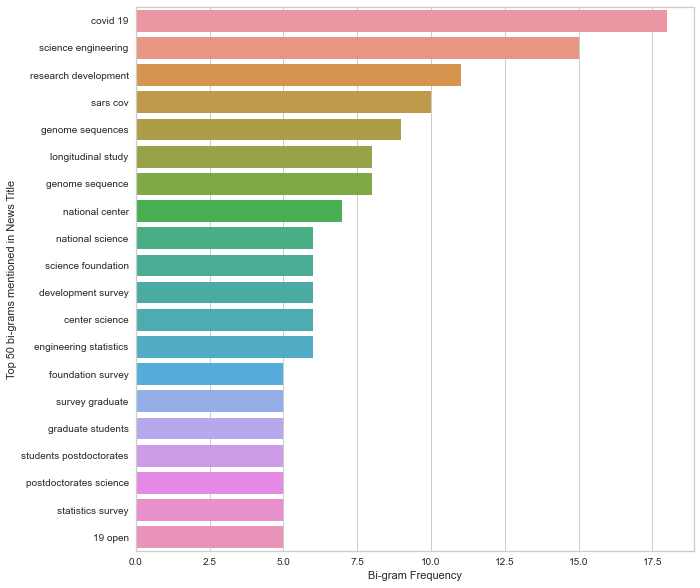

In [64]:
#Bi-grams 

def plot_top_ngrams_barchart(text, n=2):
    stop=set(stopwords.words('english'))

    new= text.str.split()
    new=new.values.tolist()
    corpus=[word for i in new for word in i]

    def _get_top_ngram(corpus, n=None):
        vec = CountVectorizer(ngram_range=(n, n)).fit(corpus)
        bag_of_words = vec.transform(corpus)
        sum_words = bag_of_words.sum(axis=0) 
        words_freq = [(word, sum_words[0, idx]) 
                      for word, idx in vec.vocabulary_.items()]
        words_freq =sorted(words_freq, key = lambda x: x[1], reverse=True)
        return words_freq[:20]

    top_n_bigrams=_get_top_ngram(text,n)[:50]
    x,y=map(list,zip(*top_n_bigrams))
    plt.figure(figsize=(10,10))
    plt.xlabel("Bi-gram Frequency")
    plt.ylabel("Top 50 bi-grams mentioned in News Title")
    sns.barplot(x=y,y=x)


plot_top_ngrams_barchart(datasets_unique['tokenized_text_join'],2)

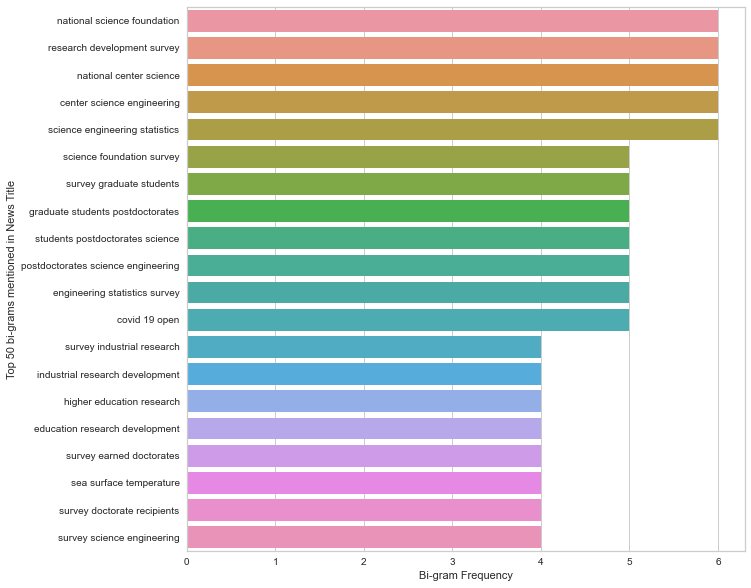

In [65]:
plot_top_ngrams_barchart(datasets_unique['tokenized_text_join'],3)

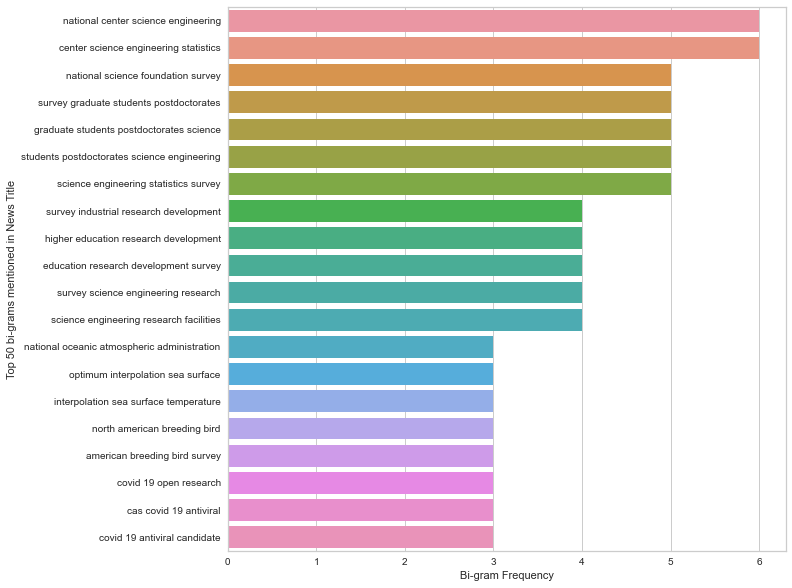

In [66]:
plot_top_ngrams_barchart(datasets_unique['tokenized_text_join'],4)